# User Experience Analysis

In [1]:
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

In [2]:
from script.connection import Connector

In [3]:
# instance of the class
connector=Connector()

In [4]:
xdr_data=connector.load_table_to_dataframe('xdr_data_cleaned')

SQLAlchemy connection is disposed


In [5]:
from script.user_experince_analyzer import ExperienceAnalyzer

In [6]:
analyzer= ExperienceAnalyzer()

### User Data Aggregate

In [7]:
user_aggregate=analyzer.user_aggregate(xdr_data)

   MSISDN/Number  TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0   3.360100e+10                 7.149236e+06                259619.136881   
1   3.360100e+10                 7.149236e+06                259619.136881   
2   3.360100e+10                 7.149236e+06                259619.136881   
3   3.360101e+10                 1.066000e+03                259619.136881   
4   3.360101e+10                 8.249433e+06                140410.568441   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  Avg RTT DL (ms)  \
0                     37.0                  39.0000        46.000000   
1                     48.0                  51.0000        30.000000   
2                     48.0                  49.0000        78.317083   
3                    204.0                  44.0000        69.000000   
4                  20197.5                 586.5232        57.000000   

   Avg RTT UL (ms)                    Handset Type  \
0         0.000000  Huawei P20 Lite Huawei N

# 10 of the top, bottom, and most frequent

In [8]:
analyzer.tcp_rtt_throughput_analysis(user_aggregate)

{'Top TCP':        MSISDN/Number  TCP DL Retrans. Vol (Bytes)  \
 46972   3.366212e+10                  335139152.0   
 23286   3.365011e+10                  344820925.0   
 31190   3.365849e+10                  348062089.0   
 58826   3.366519e+10                  353206167.0   
 67949   3.366815e+10                  351440959.0   
 64825   3.366714e+10                  345341458.0   
 16424   3.363184e+10                  339178976.0   
 38928   3.366021e+10                  330587756.0   
 39363   3.366031e+10                  333378769.0   
 39595   3.366036e+10                  329500215.0   
 
        TCP UL Retrans. Vol (Bytes)  Avg Bearer TP DL (kbps)  \
 46972                   33628302.0                  44205.0   
 23286                   14460682.0                  59510.0   
 31190                    7572826.0                  41210.0   
 58826                       1376.0                   5085.0   
 67949                     183710.0                  61441.0   
 64825   

### Distribution of average throughput and TCP retransmission by handset type

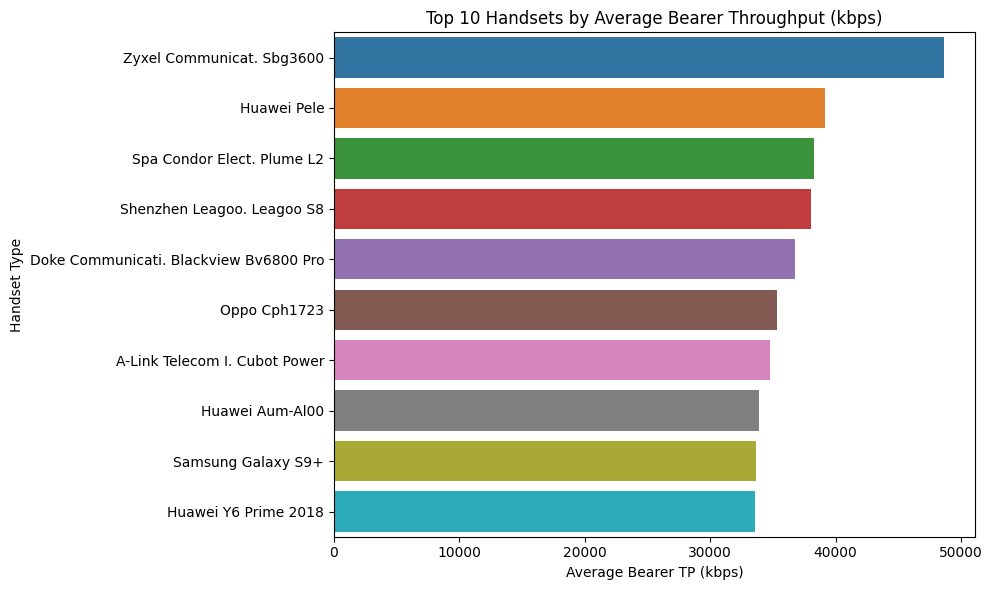

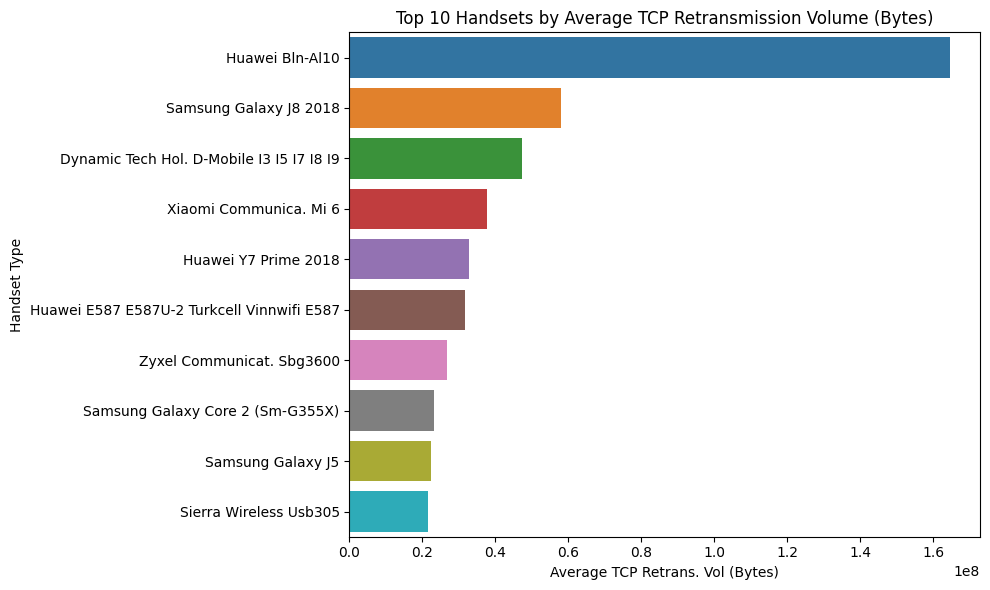

In [9]:
analyzer.throughput_tcp_handset_analysis(user_aggregate)

### K-Means clustering for user segmentation

g:\Programming\10_Academy\Week_02\Telecom_Company_Users_Data_Analytics\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "g:\Programming\10_Academy\Week_02\Telecom_Company_Users_Data_Analytics\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args,

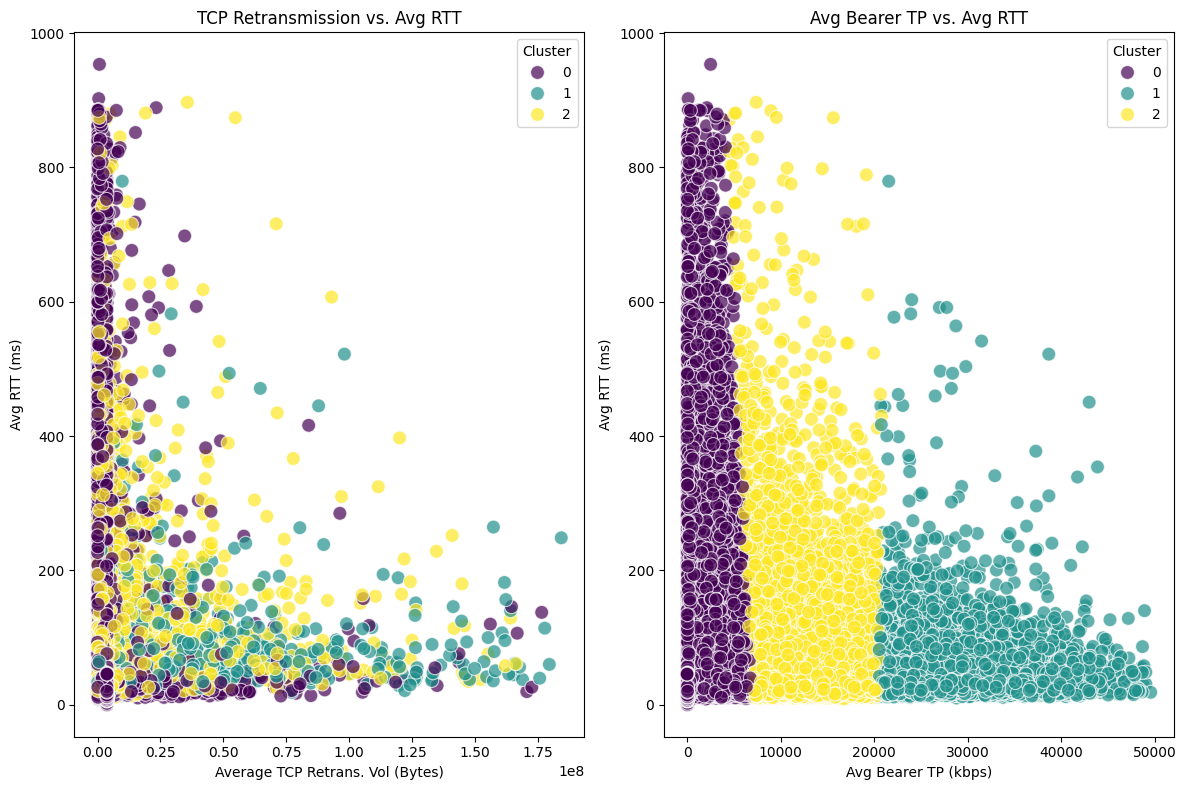

TypeError: agg function failed [how->mean,dtype->object]

In [10]:
analyzer.kmeans_clustering(user_aggregate)

In [11]:
print(user_aggregate.dtypes)

MSISDN/Number                       float64
TCP DL Retrans. Vol (Bytes)         float64
TCP UL Retrans. Vol (Bytes)         float64
Avg Bearer TP DL (kbps)             float64
Avg Bearer TP UL (kbps)             float64
Avg RTT DL (ms)                     float64
Avg RTT UL (ms)                     float64
Handset Type                         object
Average TCP Retrans. Vol (Bytes)    float64
Avg Bearer TP (kbps)                float64
Avg RTT (ms)                        float64
Cluster                               int32
dtype: object
